Martín Amado - 19020
Juan Pablo Pineda - 19087

referencia para análisis de datos: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#4.-Missing-data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from apyori import apriori

## Análisis  exploratorio
Explicación de hallazgos y conclusiones

In [3]:
data = pd.read_csv('./train.csv', encoding = "latin1")
file = open('cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('cualitativas.txt', 'r')
quali= file.read().splitlines()

## Descripcion de los datos

In [4]:
#Variables cuantitativas
data[quant].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


## Analisis de los datos

### Correlacion en variables cuantitativas

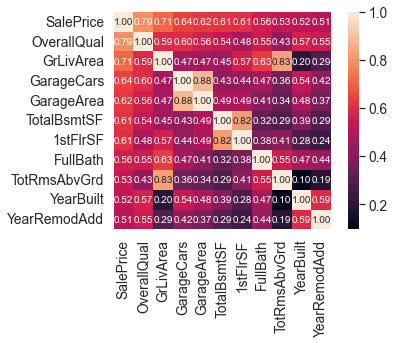

In [6]:
k = 11
corrmat = data.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

### Kurtosis, Asimetria y Gráfico de las 11 variables con mayor correlación

SalePrice :  Kurtosis: 6.509812011089439 Asimetría: 1.880940746034036 

OverallQual :  Kurtosis: 0.091856548449611 Asimetría: 0.2167209765258641 

GrLivArea :  Kurtosis: 4.874265760253215 Asimetría: 1.365155954773434 

GarageCars :  Kurtosis: 0.2161348715110729 Asimetría: -0.34219689543081294 

GarageArea :  Kurtosis: 0.9098227950882034 Asimetría: 0.1797959420587727 

TotalBsmtSF :  Kurtosis: 13.201041630635025 Asimetría: 1.522688086978629 

1stFlrSF :  Kurtosis: 5.722076026587489 Asimetría: 1.3753417421837937 

FullBath :  Kurtosis: -0.8582173323828637 Asimetría: 0.0365239844325461 

TotRmsAbvGrd :  Kurtosis: 0.8736413737415689 Asimetría: 0.6756457673102017 

YearBuilt :  Kurtosis: -0.44215484565294716 Asimetría: -0.612830724202899 

YearRemodAdd :  Kurtosis: -1.2719991404772555 Asimetría: -0.5030444967597948 



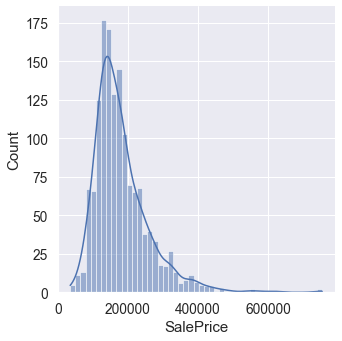

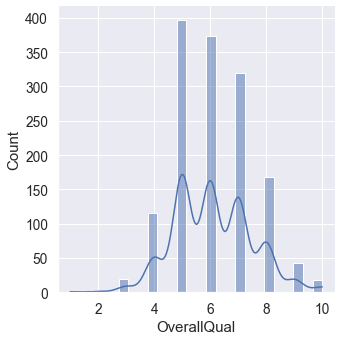

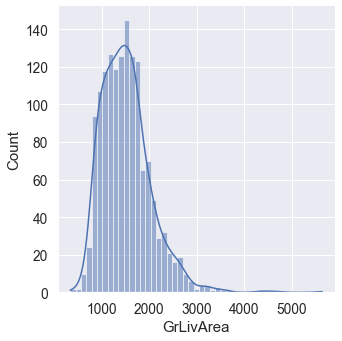

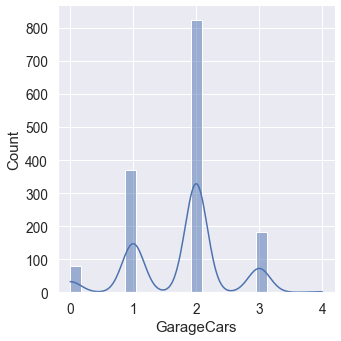

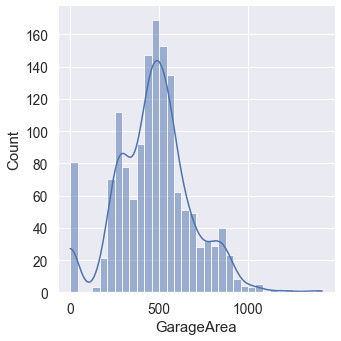

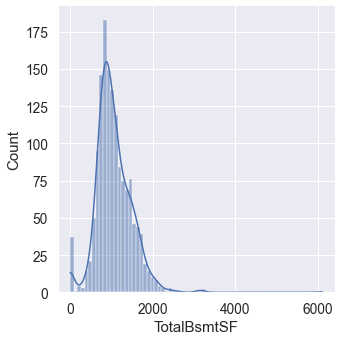

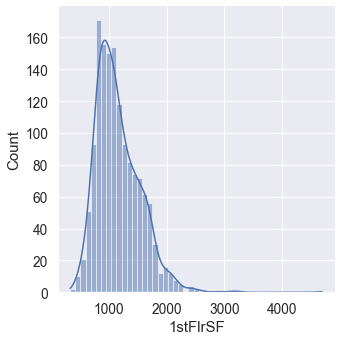

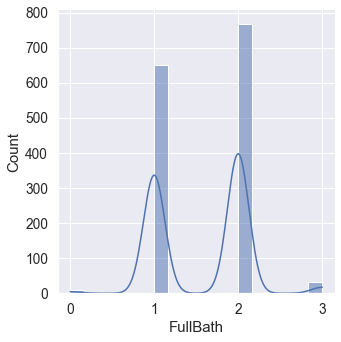

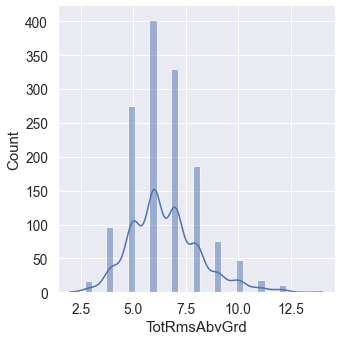

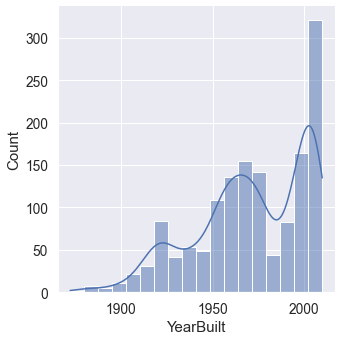

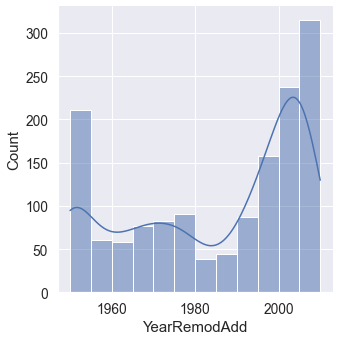

In [7]:
for var in columns:
    localData = data[var].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( var, ':', ' Kurtosis:', stats.kurtosis(localData), 'Asimetría:', stats.skew(localData), '\n')

### Gráfico de pares de las 11 variables cuantitativas con mayor correlación

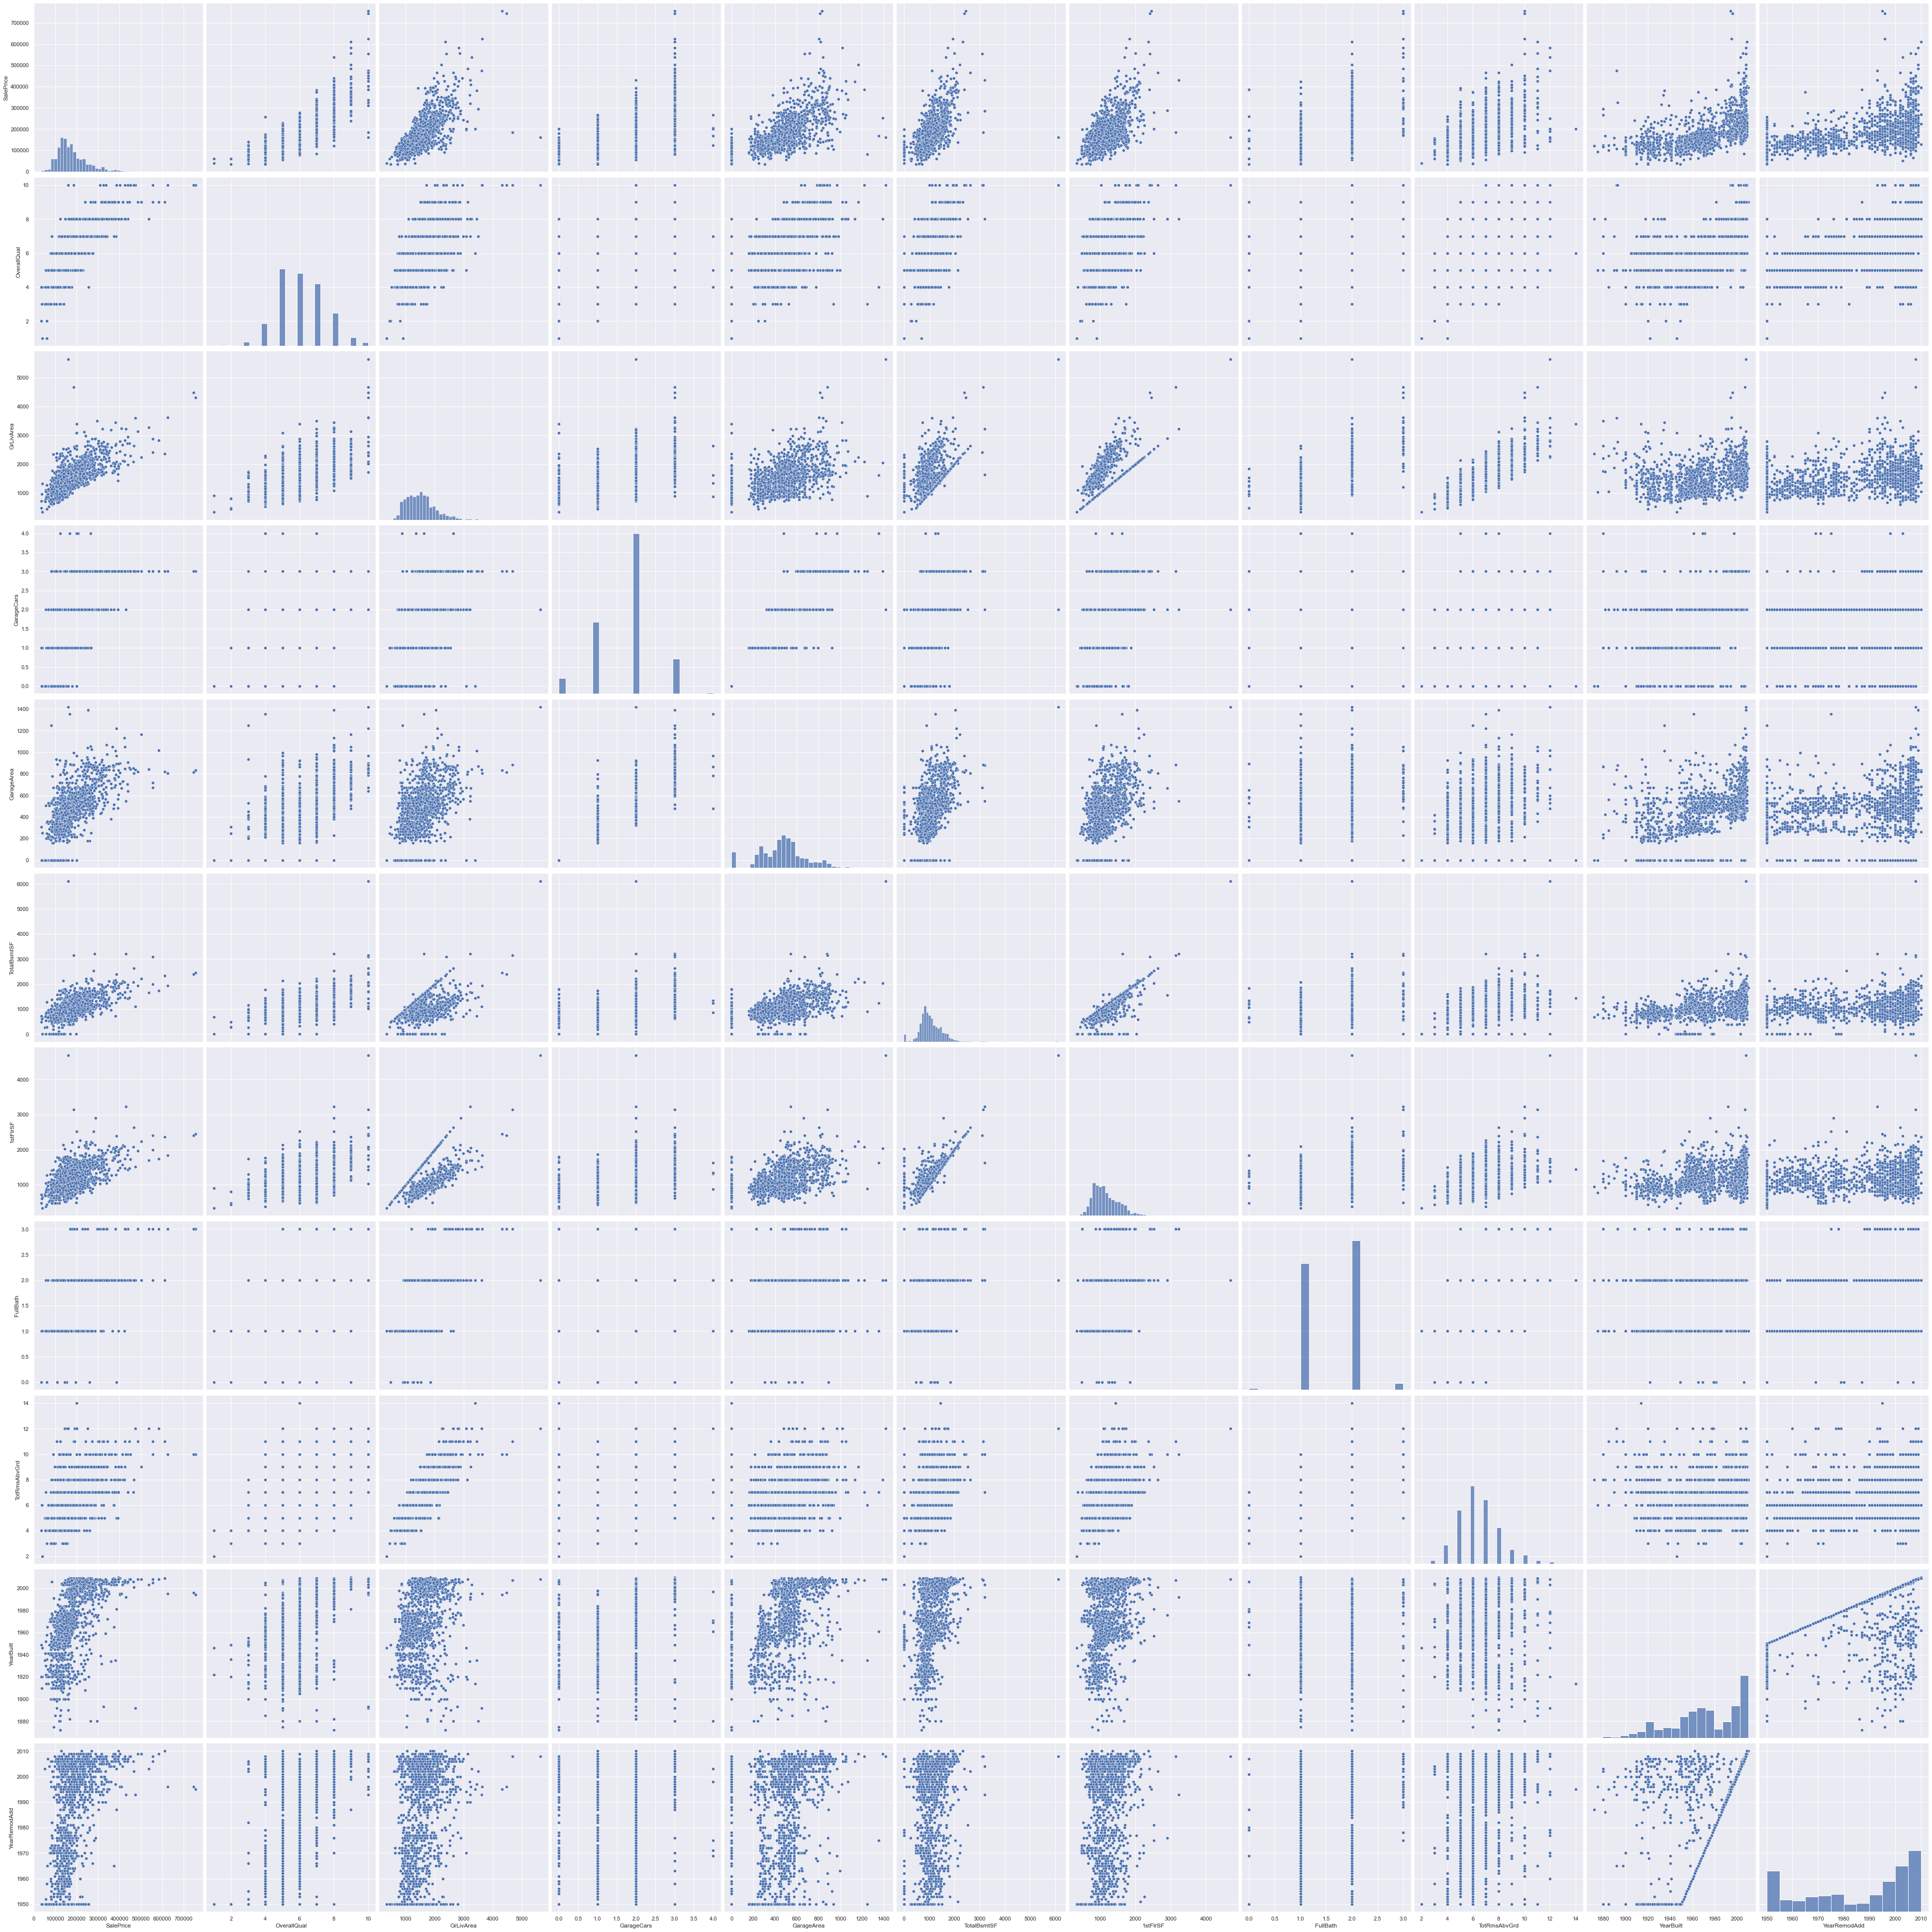

In [8]:
sns.set()
sns.pairplot(data[columns], height= 5)
plt.show()

### Gráficos de barras de las variables cualitativas

MSSubClass


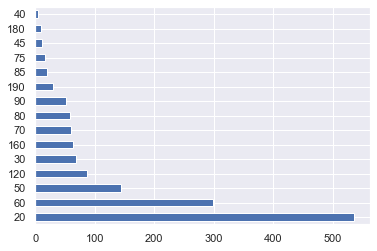

<Figure size 1440x360 with 0 Axes>

MSZoning


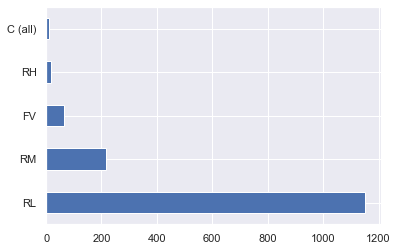

<Figure size 1440x360 with 0 Axes>

Street


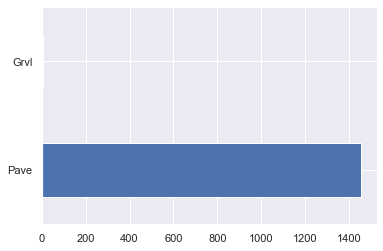

<Figure size 1440x360 with 0 Axes>

Alley


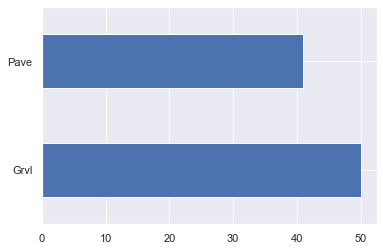

<Figure size 1440x360 with 0 Axes>

LotShape


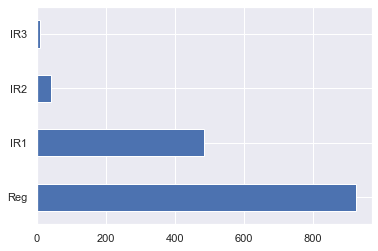

<Figure size 1440x360 with 0 Axes>

LandContour


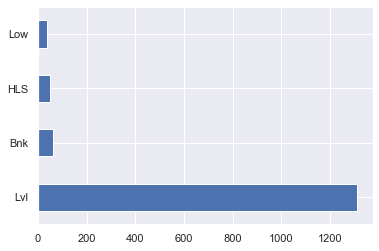

<Figure size 1440x360 with 0 Axes>

Utilities


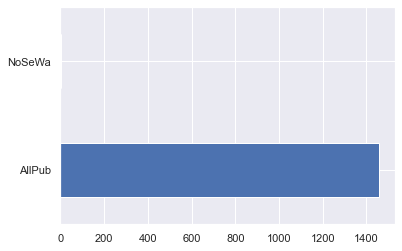

<Figure size 1440x360 with 0 Axes>

LotConfig


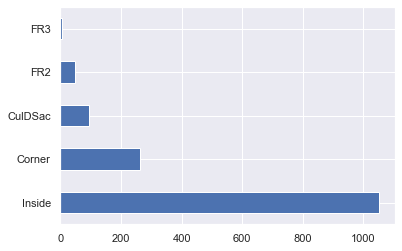

<Figure size 1440x360 with 0 Axes>

LandSlope


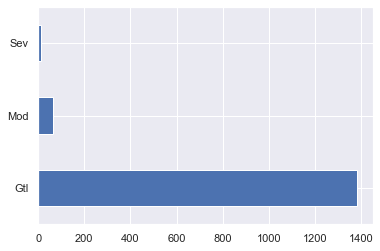

<Figure size 1440x360 with 0 Axes>

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Condition1


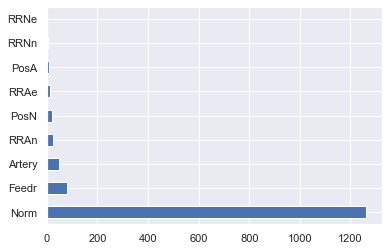

<Figure size 1440x360 with 0 Axes>

Condition2


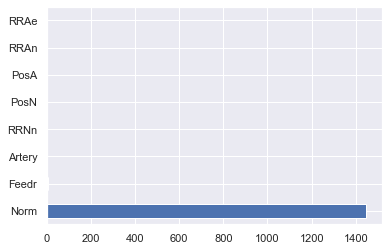

<Figure size 1440x360 with 0 Axes>

BldgType


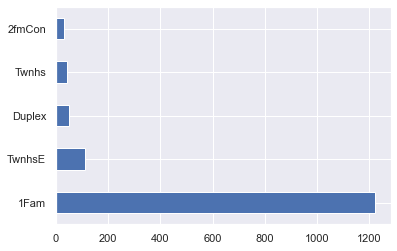

<Figure size 1440x360 with 0 Axes>

HouseStyle


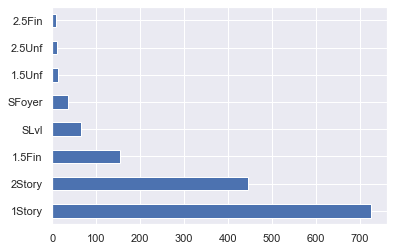

<Figure size 1440x360 with 0 Axes>

OverallQual


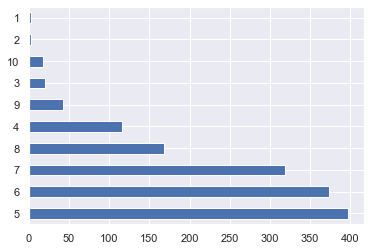

<Figure size 1440x360 with 0 Axes>

OverallCond


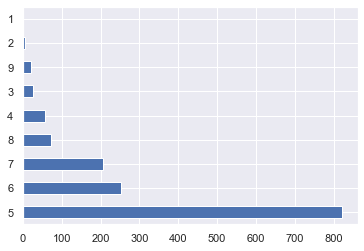

<Figure size 1440x360 with 0 Axes>

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3
1989     3

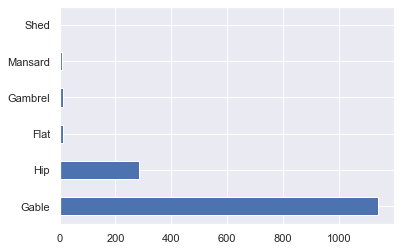

<Figure size 1440x360 with 0 Axes>

RoofMatl


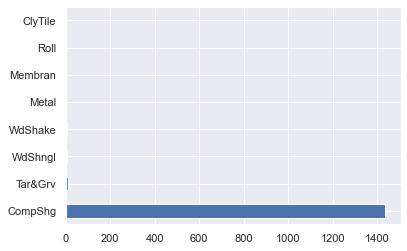

<Figure size 1440x360 with 0 Axes>

Exterior1st


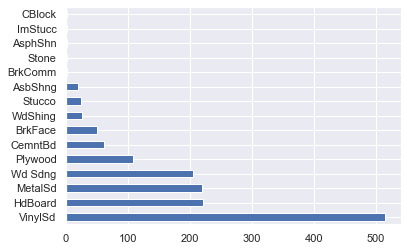

<Figure size 1440x360 with 0 Axes>

Exterior2nd


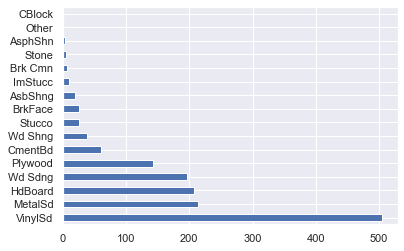

<Figure size 1440x360 with 0 Axes>

MasVnrType


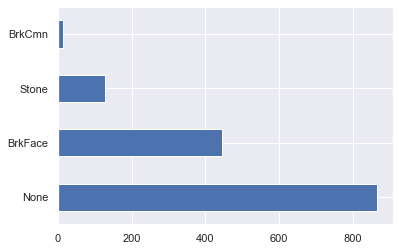

<Figure size 1440x360 with 0 Axes>

ExterQual


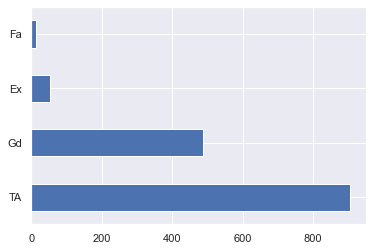

<Figure size 1440x360 with 0 Axes>

ExterCond


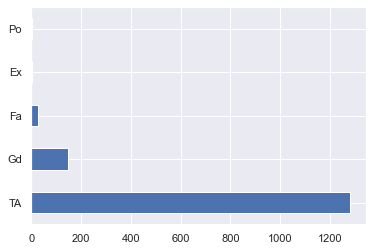

<Figure size 1440x360 with 0 Axes>

Foundation


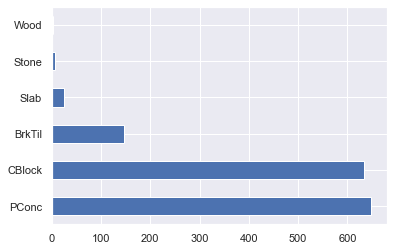

<Figure size 1440x360 with 0 Axes>

BsmtQual


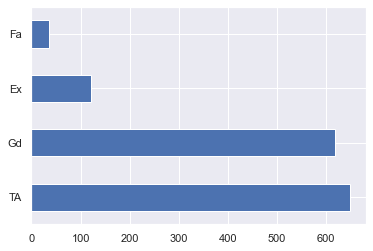

<Figure size 1440x360 with 0 Axes>

BsmtCond


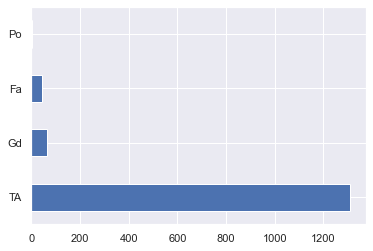

<Figure size 1440x360 with 0 Axes>

BsmtExposure


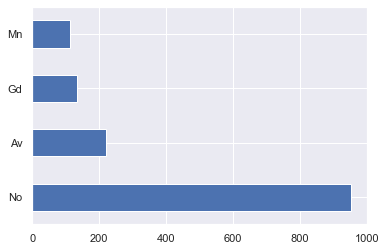

<Figure size 1440x360 with 0 Axes>

BsmtFinType1


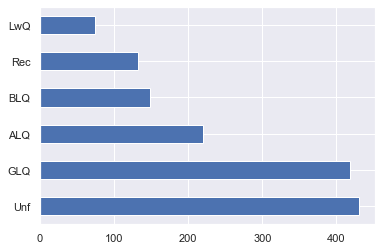

<Figure size 1440x360 with 0 Axes>

BsmtFinType2


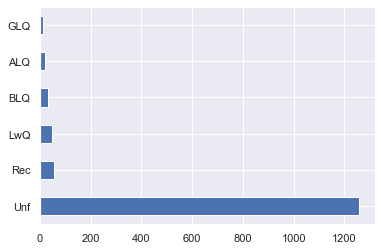

<Figure size 1440x360 with 0 Axes>

Heating


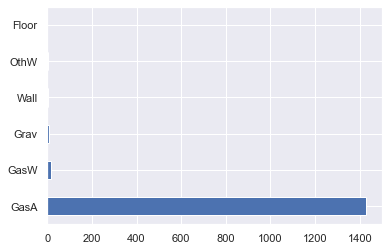

<Figure size 1440x360 with 0 Axes>

HeatingQC


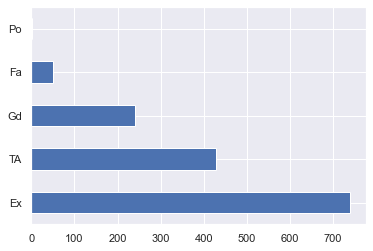

<Figure size 1440x360 with 0 Axes>

CentralAir


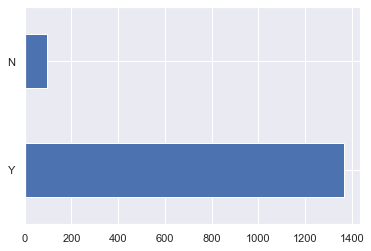

<Figure size 1440x360 with 0 Axes>

Electrical


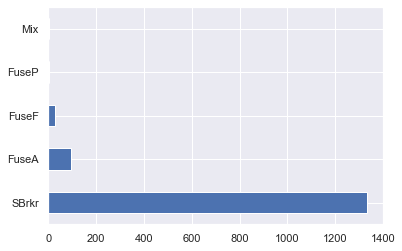

<Figure size 1440x360 with 0 Axes>

MoSold


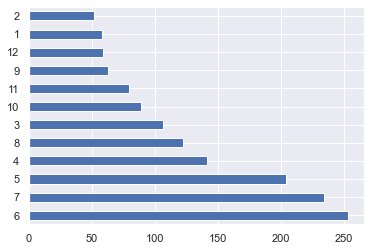

<Figure size 1440x360 with 0 Axes>

YrSold


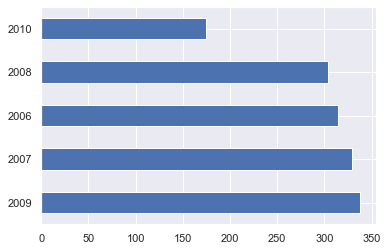

<Figure size 1440x360 with 0 Axes>

SaleType


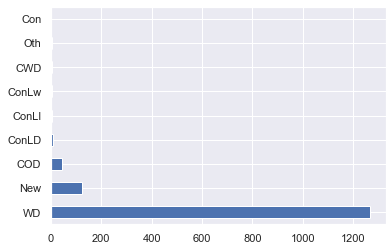

<Figure size 1440x360 with 0 Axes>

SaleCondition


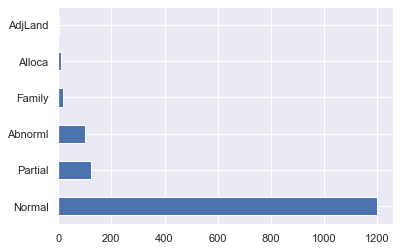

<Figure size 1440x360 with 0 Axes>

PoolQC


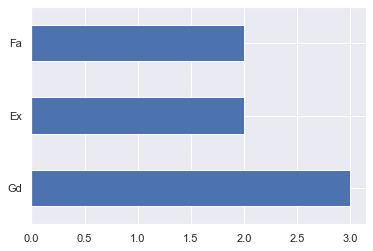

<Figure size 1440x360 with 0 Axes>

Fence


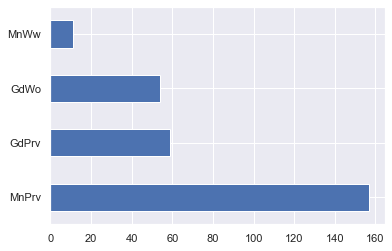

<Figure size 1440x360 with 0 Axes>

Functional


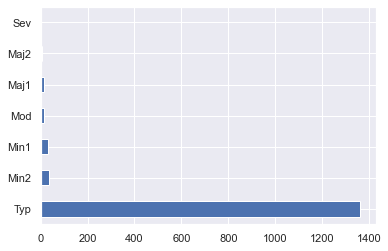

<Figure size 1440x360 with 0 Axes>

MiscFeature


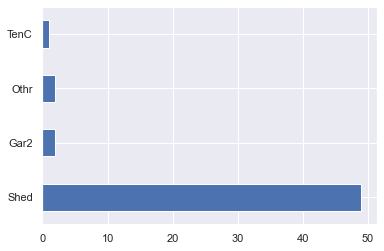

<Figure size 1440x360 with 0 Axes>

GarageQual


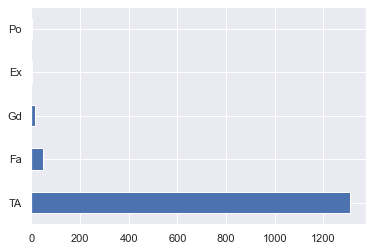

<Figure size 1440x360 with 0 Axes>

GarageCond


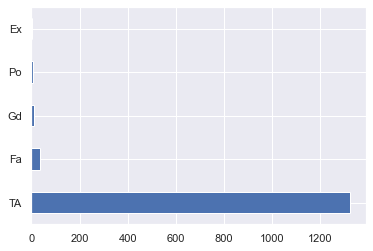

<Figure size 1440x360 with 0 Axes>

PavedDrive


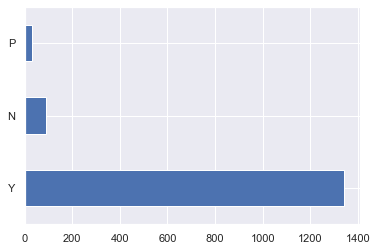

<Figure size 1440x360 with 0 Axes>

FireplaceQu


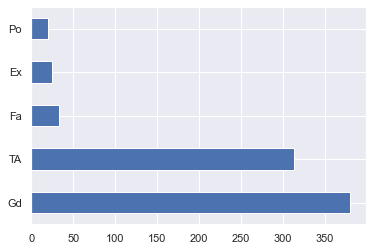

<Figure size 1440x360 with 0 Axes>

GarageType


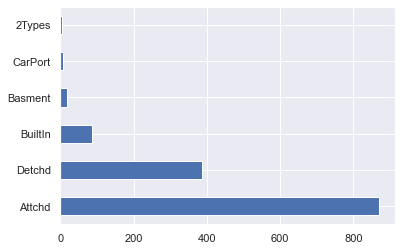

<Figure size 1440x360 with 0 Axes>

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

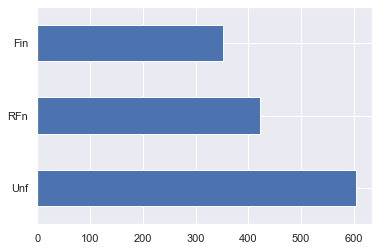

<Figure size 1440x360 with 0 Axes>

KitchenQual


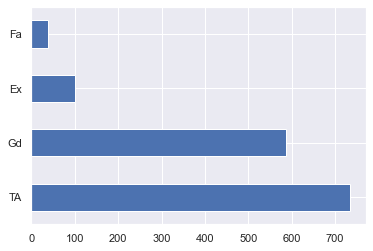

<Figure size 1440x360 with 0 Axes>

In [9]:
#Variables cualitativas
pd.set_option("display.max_rows", data.shape[0]+1)
for var in quali:
  #Se omite ID ya que, en este caso no aporta ninguna informacion importante.
  if(var == "Id"):
    pass
  #Se reemplaza el grafico de barras en estas variables por una tabla de frecuencias ya que la informacion era ilegible
  elif(var in ["Neighborhood", "YearBuilt", "YearRemodAdd", "GarageYrBlt"]):
    print(data[var].value_counts(), "\n")
  #muestra graficos de barras legibles.
  else:
    data[var].value_counts().plot(kind='barh')
    plt.figure(figsize=(20,5))
    print(var)
    plt.show()

### Gráficos de Caja y Bigotes de las variables Cuantitativas

<AxesSubplot:>

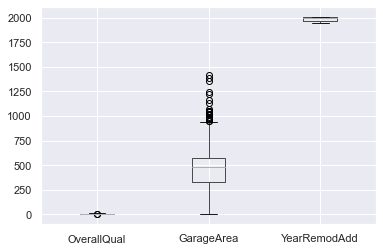

In [10]:
data.boxplot(column=["OverallQual", "GarageArea", "YearRemodAdd"])

### Kurtosis, Asimetria y Gráfico de las otras variables cuantitativas

Id


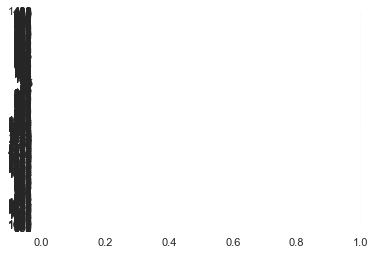

<Figure size 1440x360 with 0 Axes>

MSSubClass


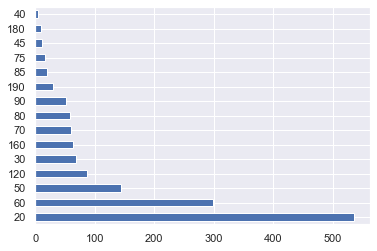

<Figure size 1440x360 with 0 Axes>

MSZoning


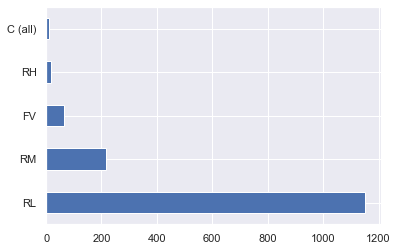

<Figure size 1440x360 with 0 Axes>

Street


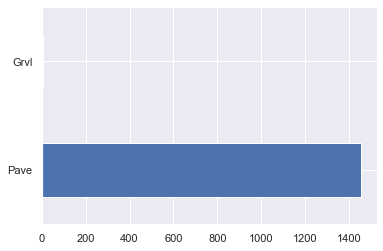

<Figure size 1440x360 with 0 Axes>

Alley


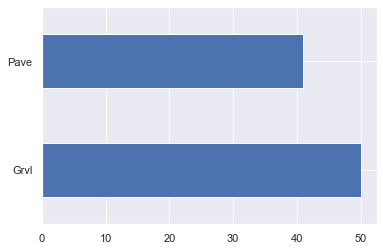

<Figure size 1440x360 with 0 Axes>

LotShape


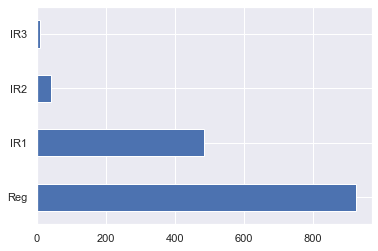

<Figure size 1440x360 with 0 Axes>

LandContour


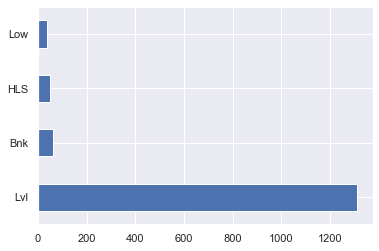

<Figure size 1440x360 with 0 Axes>

Utilities


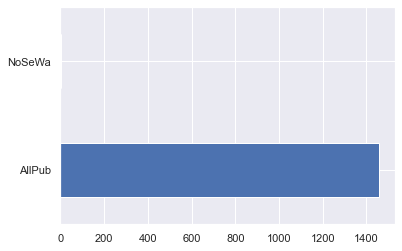

<Figure size 1440x360 with 0 Axes>

LotConfig


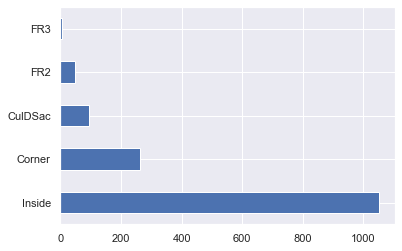

<Figure size 1440x360 with 0 Axes>

LandSlope


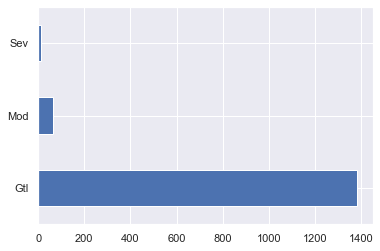

<Figure size 1440x360 with 0 Axes>

Neighborhood


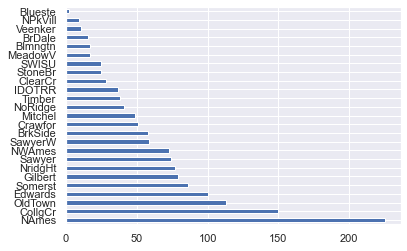

<Figure size 1440x360 with 0 Axes>

Condition1


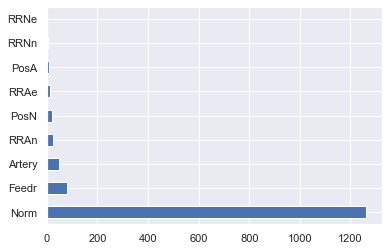

<Figure size 1440x360 with 0 Axes>

Condition2


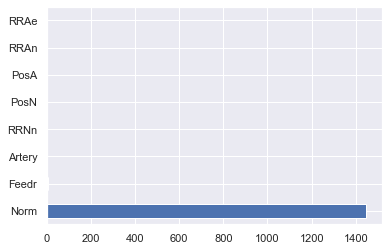

<Figure size 1440x360 with 0 Axes>

BldgType


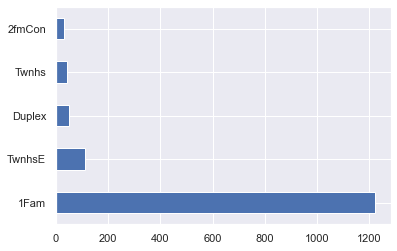

<Figure size 1440x360 with 0 Axes>

HouseStyle


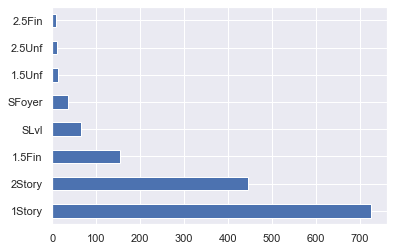

<Figure size 1440x360 with 0 Axes>

OverallQual


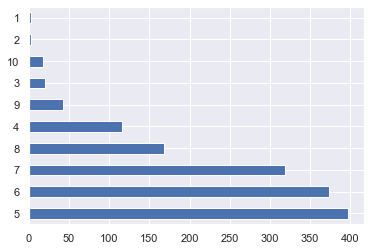

<Figure size 1440x360 with 0 Axes>

OverallCond


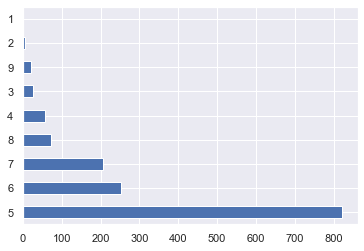

<Figure size 1440x360 with 0 Axes>

YearBuilt


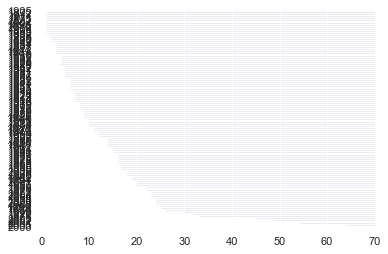

<Figure size 1440x360 with 0 Axes>

YearRemodAdd


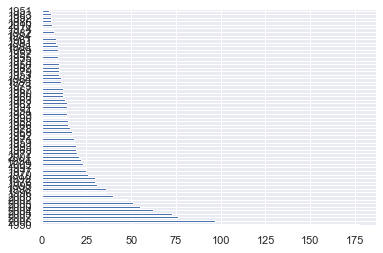

<Figure size 1440x360 with 0 Axes>

RoofStyle


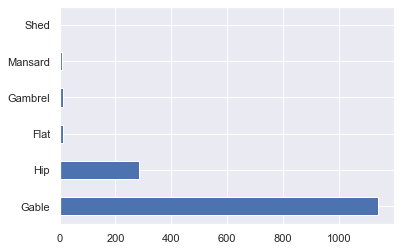

<Figure size 1440x360 with 0 Axes>

RoofMatl


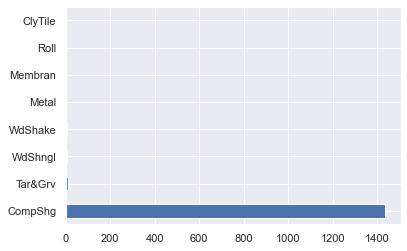

<Figure size 1440x360 with 0 Axes>

Exterior1st


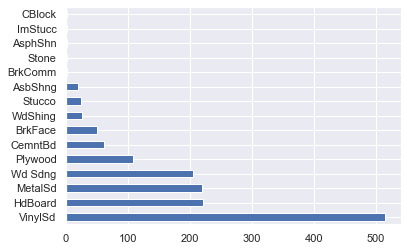

<Figure size 1440x360 with 0 Axes>

Exterior2nd


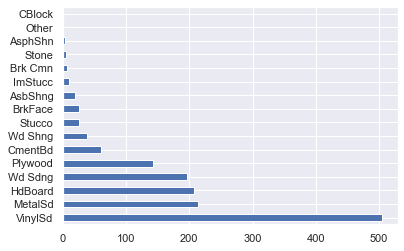

<Figure size 1440x360 with 0 Axes>

MasVnrType


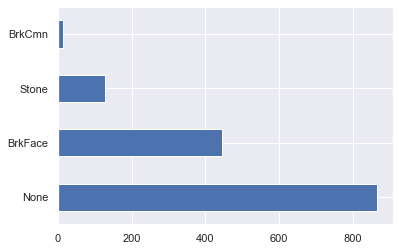

<Figure size 1440x360 with 0 Axes>

ExterQual


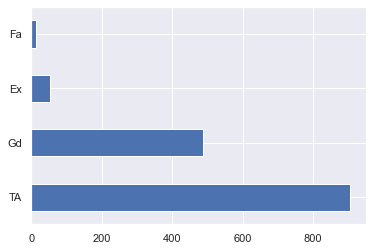

<Figure size 1440x360 with 0 Axes>

ExterCond


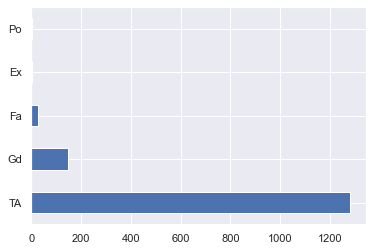

<Figure size 1440x360 with 0 Axes>

Foundation


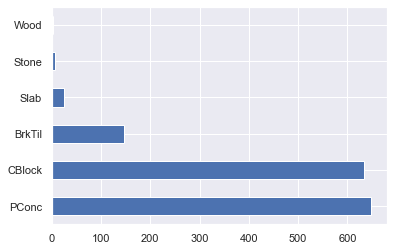

<Figure size 1440x360 with 0 Axes>

BsmtQual


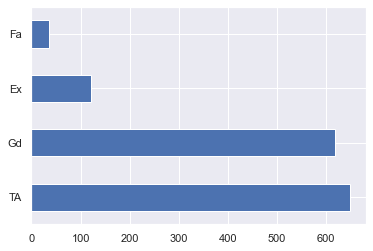

<Figure size 1440x360 with 0 Axes>

BsmtCond


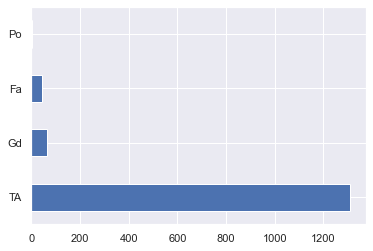

<Figure size 1440x360 with 0 Axes>

BsmtExposure


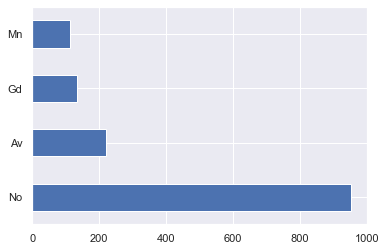

<Figure size 1440x360 with 0 Axes>

BsmtFinType1


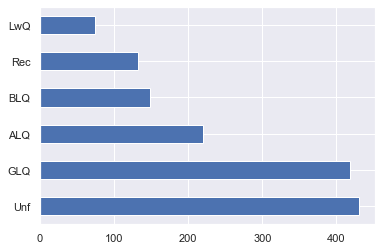

<Figure size 1440x360 with 0 Axes>

BsmtFinType2


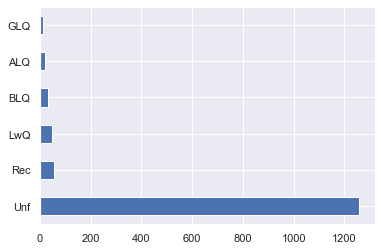

<Figure size 1440x360 with 0 Axes>

Heating


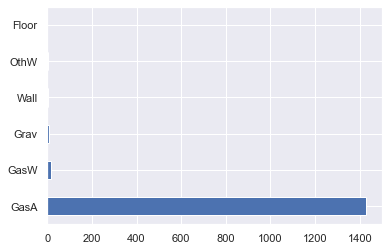

<Figure size 1440x360 with 0 Axes>

HeatingQC


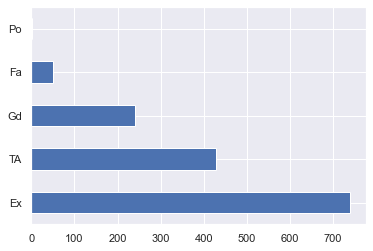

<Figure size 1440x360 with 0 Axes>

CentralAir


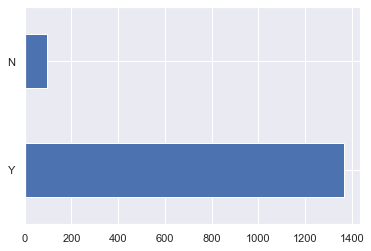

<Figure size 1440x360 with 0 Axes>

Electrical


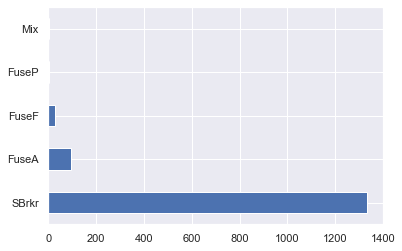

<Figure size 1440x360 with 0 Axes>

MoSold


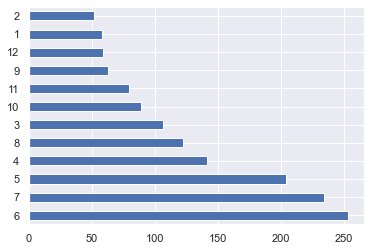

<Figure size 1440x360 with 0 Axes>

YrSold


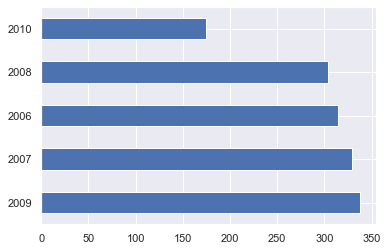

<Figure size 1440x360 with 0 Axes>

SaleType


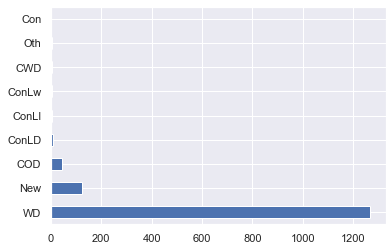

<Figure size 1440x360 with 0 Axes>

SaleCondition


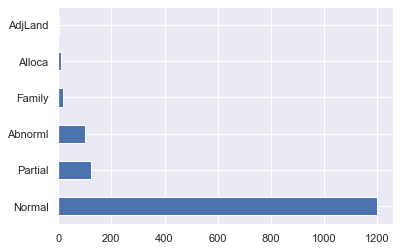

<Figure size 1440x360 with 0 Axes>

PoolQC


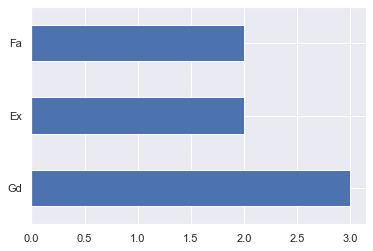

<Figure size 1440x360 with 0 Axes>

Fence


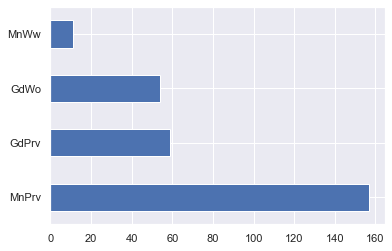

<Figure size 1440x360 with 0 Axes>

Functional


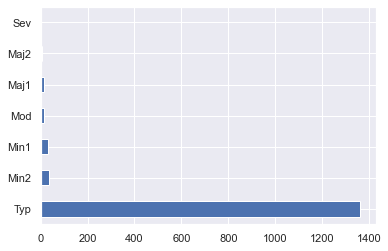

<Figure size 1440x360 with 0 Axes>

MiscFeature


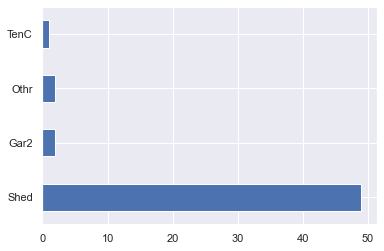

<Figure size 1440x360 with 0 Axes>

GarageQual


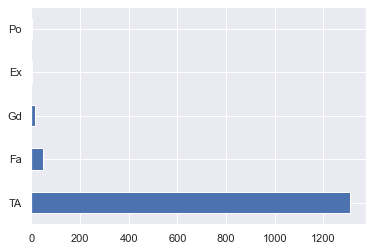

<Figure size 1440x360 with 0 Axes>

GarageCond


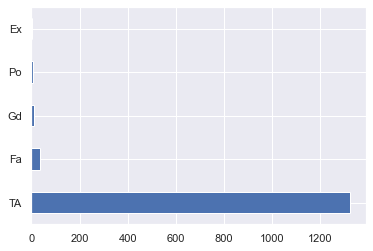

<Figure size 1440x360 with 0 Axes>

PavedDrive


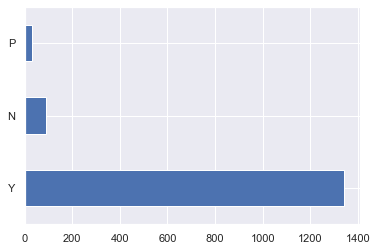

<Figure size 1440x360 with 0 Axes>

FireplaceQu


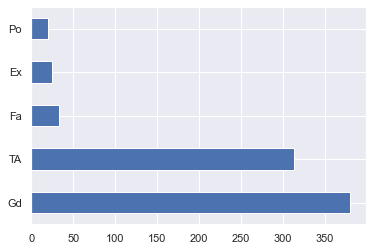

<Figure size 1440x360 with 0 Axes>

GarageType


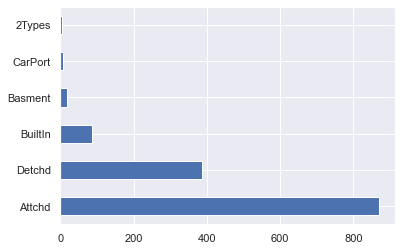

<Figure size 1440x360 with 0 Axes>

GarageYrBlt


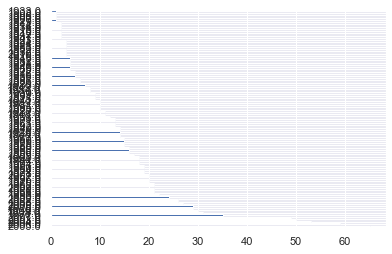

<Figure size 1440x360 with 0 Axes>

GarageFinish


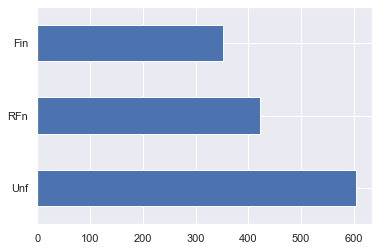

<Figure size 1440x360 with 0 Axes>

KitchenQual


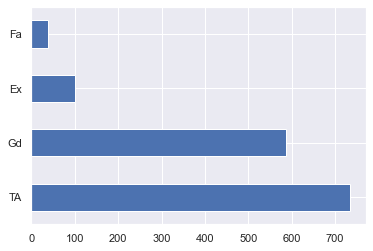

<Figure size 1440x360 with 0 Axes>

In [11]:
#Variables cualitativas
for var in quali:
  data[var].value_counts().plot(kind='barh')
  plt.figure(figsize=(20,5))
  print(var)
  plt.show()

### Kurtosis, Asimetria y Gráfico de las otras variables cuantitativas

LotFrontage :  Kurtosis: 17.375300497599614 Asimetría: 2.160865994705543 

LotArea :  Kurtosis: 202.5437927513529 Asimetría: 12.195142125084478 

MasVnrArea :  Kurtosis: 10.04360232122905 Asimetría: 2.6663261001607435 

BsmtFinSF1 :  Kurtosis: 11.076089857631942 Asimetría: 1.6837708962341815 

BsmtFinSF2 :  Kurtosis: 20.04041549471293 Asimetría: 4.250888017057445 

BsmtUnfSF :  Kurtosis: 0.4692620789683075 Asimetría: 0.9193227015582005 

2ndFlrSF :  Kurtosis: -0.5556767272864769 Asimetría: 0.8121942731961613 

LowQualFinSF :  Kurtosis: 82.945932358931 Asimetría: 9.002080417658552 

BsmtFullBath :  Kurtosis: -0.8403341716305701 Asimetría: 0.5954540376067279 

BsmtHalfBath :  Kurtosis: 16.33643610470807 Asimetría: 4.0991856695420035 

HalfBath :  Kurtosis: -1.0773494880033716 Asimetría: 0.6752028347742616 

BedroomAbvGr :  Kurtosis: 2.2191351469935663 Asimetría: 0.21157244158228097 

KitchenAbvGr :  Kurtosis: 21.45462663100792 Asimetría: 4.483784093860484 

Fireplaces :  Kurtosis: -0.220

C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


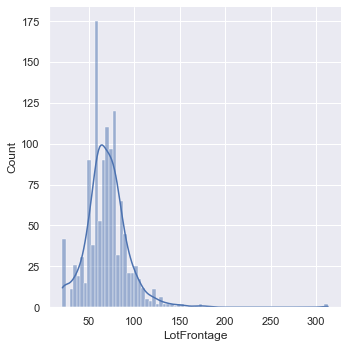

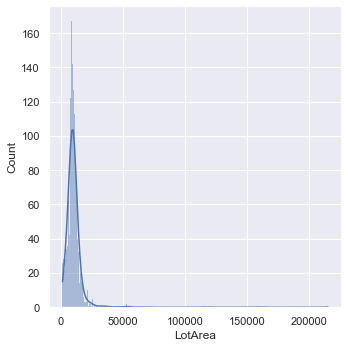

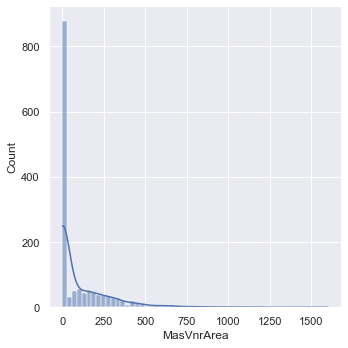

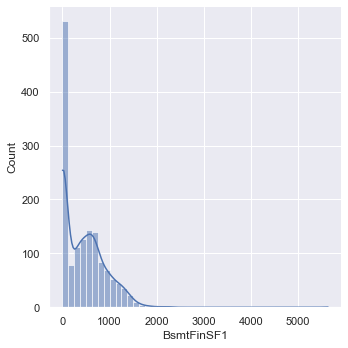

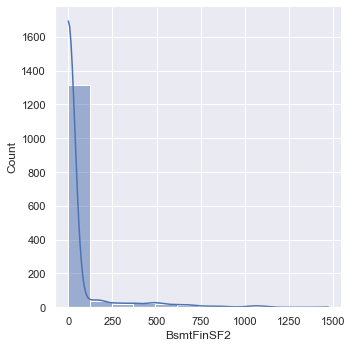

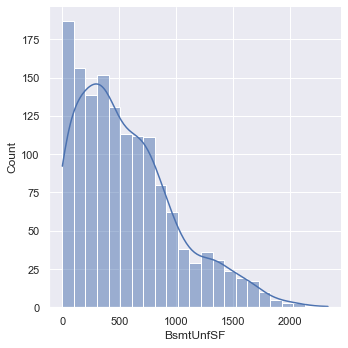

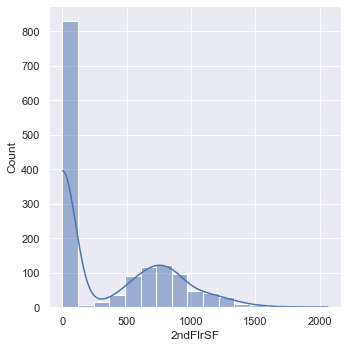

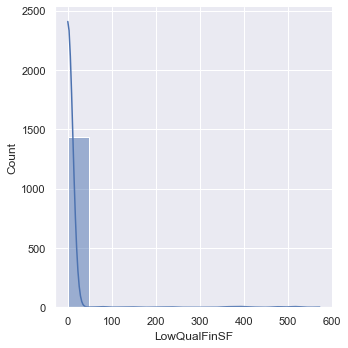

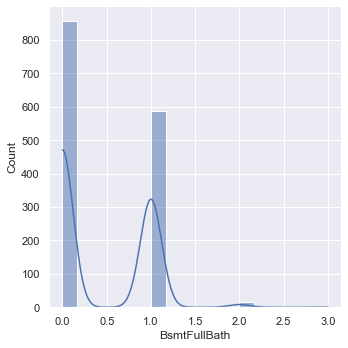

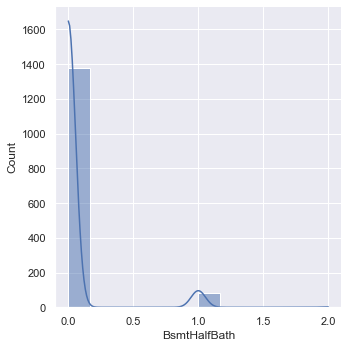

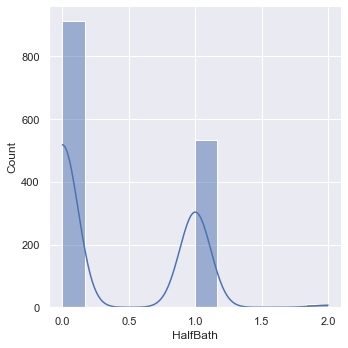

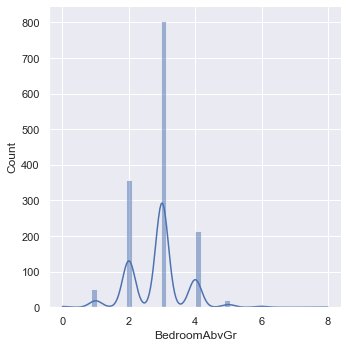

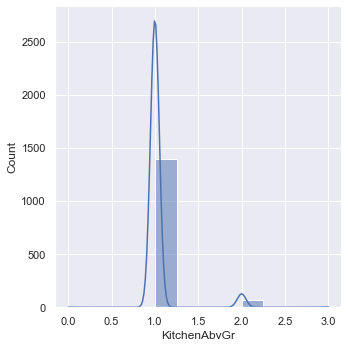

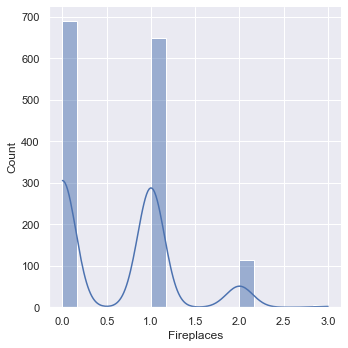

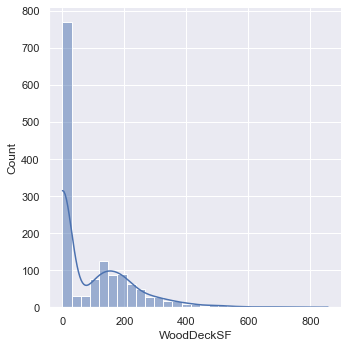

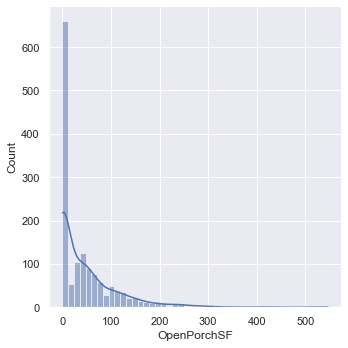

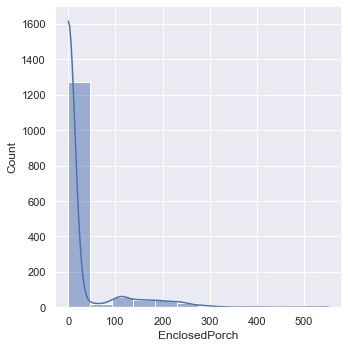

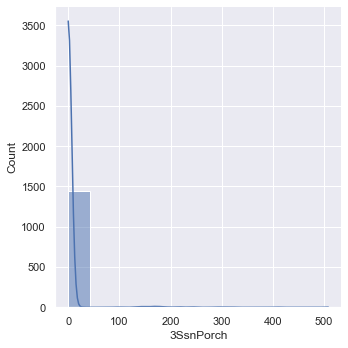

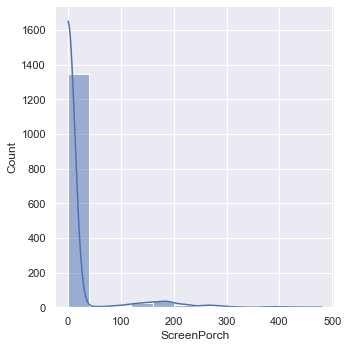

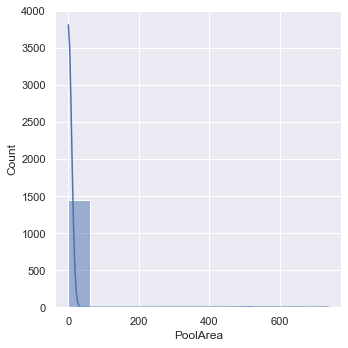

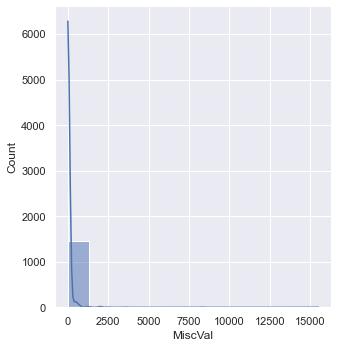

In [12]:
for var in quant:
  if var not in columns:
    localData = data[var].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( var, ':', ' Kurtosis:', stats.kurtosis(localData), 'Asimetría:', stats.skew(localData), '\n')

### Análisis PCA

De acuerdo con la matriz de correlación presentada anteriormente, se observan 3 fenómenos importantes:
-Dentro de las 11 variables con mayor correlación, hay correlación alta y baja
-La correlación alta por lo general es entre variables que se conectan por lo que miden (garage con cantidad de carros)
-La correlación baja se da entre variables de tamaño vs año.

####  Indice  KMO  y  el  test  de  esfericidad  de  Bartlett

In [13]:
### LotFrontage Nan is replaced with 0, assuming no length of street touches the property
data['LotFrontage'] = data['LotFrontage'].fillna(0)

### MasVnrArea Nan is replaced with 0, assuming no Veneer is present therefor the area is 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [17]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(data[quant])
chi_cuadrado, p_valor

(115688.17687252168, 0.0)

Analisis: El valor de p es menor a 0.05, lo que indica correlacion entre variables y el rechazo de la hipotesis nula

In [18]:
kmo,kmo_modelo = calculate_kmo(data[quant])
kmo_modelo

0.5677490299812246

Analisis: Con un indice mayor a 0.5, la adecuacion muestral para analisis factorial es valida, y se puede hacer el analisis de componentes principales

### Analisis de Componentes Principales

In [19]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data[quant])

pca_model = pca_pipe.named_steps['pca']

pd.DataFrame(
  data = pca_model.components_,
  columns = data[quant].columns,
  index = ['PC1','PC2','PC3','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30']
)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
PC1,1.134949e-01,1.374063e-01,2.093128e-01,0.153173,-0.003146,0.114094,0.273005,0.284671,0.167636,0.003613,...,2.827063e-01,2.826851e-01,1.404454e-01,1.562483e-01,-5.047889e-02,1.500228e-02,5.025155e-02,6.375675e-02,-8.318093e-03,3.450870e-01
PC2,-1.411780e-04,1.001836e-01,5.075174e-02,0.383057,0.108139,-0.169673,0.267113,0.227290,-0.410710,-0.100319,...,7.372941e-02,1.185117e-01,9.774960e-02,-2.559201e-02,-8.123329e-02,2.752501e-02,2.219799e-02,2.771387e-02,-2.024119e-02,7.061674e-02
PC3,1.719456e-01,-7.738899e-02,-5.671786e-03,-0.287954,-0.127831,0.575351,0.233122,0.237970,-0.315507,-0.006072,...,9.249946e-02,9.274056e-02,-1.231903e-01,-3.155683e-02,7.633106e-03,5.694248e-02,-8.639541e-02,-9.598946e-02,-4.649877e-02,-1.568949e-02
PC5,1.939341e-01,2.327621e-01,-1.783648e-01,0.095443,0.240629,-0.063887,0.123362,0.224281,-0.085457,0.273103,...,-3.006628e-01,-2.452586e-01,-6.500143e-02,-9.972786e-02,2.946275e-01,-4.895944e-02,4.365607e-02,2.566596e-01,9.817007e-02,-1.130698e-01
PC6,-4.006556e-02,1.492055e-01,-3.998717e-02,-0.209944,0.313017,0.168980,0.067032,0.015114,-0.023920,0.128557,...,-8.492268e-02,-8.692571e-02,-4.294838e-03,1.471790e-01,-1.220867e-03,-1.414749e-02,4.434302e-01,1.227047e-01,-9.230786e-03,3.785611e-02
PC7,-3.172634e-01,2.338385e-01,5.914701e-02,-0.054282,0.163491,-0.024070,-0.020559,0.062796,-0.058193,-0.276127,...,2.887549e-03,-4.299127e-02,3.342673e-01,-2.683857e-01,-1.876073e-01,9.496221e-02,-1.781378e-01,-2.483674e-01,2.049293e-01,-3.052491e-02
PC8,-1.732974e-01,-5.852397e-02,1.507761e-02,0.008257,0.033052,0.012090,0.032915,0.059348,-0.064127,-0.164696,...,-2.403176e-02,-3.926469e-02,-2.919824e-01,1.179090e-01,-2.978099e-01,-1.679247e-01,5.562103e-01,-2.025112e-01,4.404460e-01,-3.274238e-02
PC9,2.328971e-01,-1.001407e-01,1.856385e-01,0.216988,-0.342241,-0.119715,-0.020835,-0.000161,-0.000305,0.001718,...,-2.433113e-02,-9.794117e-03,-3.649733e-01,-8.015257e-02,-1.025188e-01,5.627398e-01,2.131209e-01,8.939366e-02,-1.913039e-02,-1.611390e-02
PC10,-1.923540e-01,1.114505e-01,-2.092301e-02,0.026879,-0.339172,0.119616,0.023704,-0.008217,0.040387,0.006637,...,-6.977872e-02,-5.410303e-02,8.738569e-02,-7.961818e-03,2.474849e-01,2.356897e-01,-1.851605e-01,2.681926e-01,6.774295e-01,4.710603e-02
PC11,-2.026191e-01,4.379001e-02,-1.669329e-01,0.001652,-0.014293,0.042458,0.039226,0.033656,-0.047098,0.474585,...,-1.812064e-01,-1.866115e-01,1.952573e-01,2.736540e-01,-5.123085e-01,4.078107e-01,-8.424819e-02,-1.125298e-01,-9.805799e-02,-2.708241e-03


#### Variable y su componente

C:\Users\juanp\AppData\Local\Temp\ipykernel_13916\2743920361.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


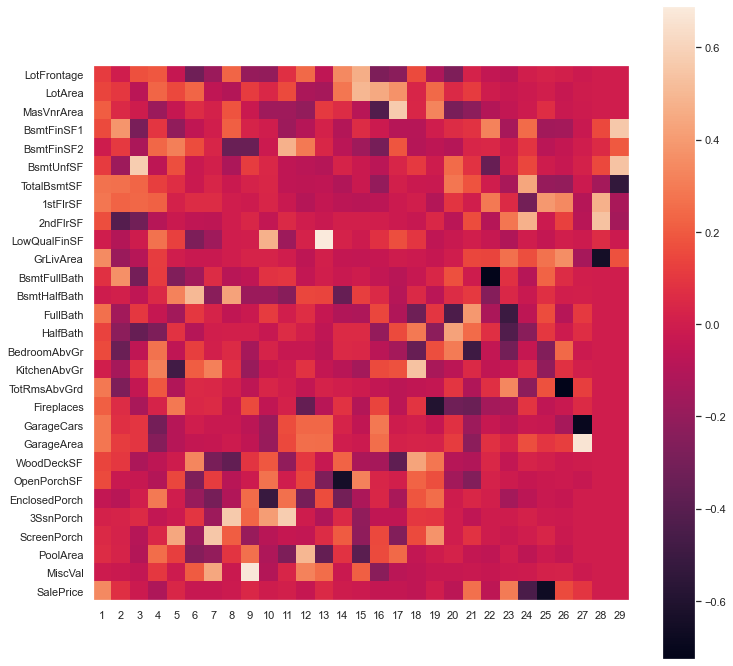

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = pca_model.components_
plt.imshow(componentes.T)
plt.yticks(range(len(data[quant].columns)), data[quant].columns)
plt.xticks(range(len(data[quant].columns)), np.arange(pca_model.n_components_)+1)
plt.grid(False)
plt.colorbar();
fig.set_size_inches(12, 12)

### Varianza por componente

In [21]:
pca_model.explained_variance_ratio_

array([2.18396719e-01, 1.03571268e-01, 6.66464855e-02, 5.49403706e-02,
       4.37908269e-02, 3.90729816e-02, 3.72884339e-02, 3.66697846e-02,
       3.50211290e-02, 3.41591407e-02, 3.33779147e-02, 3.25853473e-02,
       3.09303255e-02, 2.99903732e-02, 2.89294597e-02, 2.70941789e-02,
       2.36680384e-02, 2.19555664e-02, 2.13927041e-02, 2.01189067e-02,
       1.64334736e-02, 1.17707820e-02, 1.00754824e-02, 7.35304684e-03,
       6.48488221e-03, 4.81716475e-03, 3.46521416e-03, 4.30711584e-32,
       1.71064868e-33])

Text(0, 0.5, 'Por. varianza explicada')

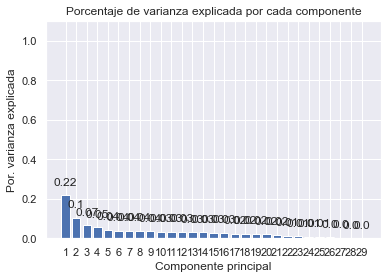

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_model.n_components_) + 1,
    height = pca_model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data[quant].columns)) + 1, pca_model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.21839672 0.32196799 0.38861447 0.44355484 0.48734567 0.52641865
 0.56370709 0.60037687 0.635398   0.66955714 0.70293505 0.7355204
 0.76645073 0.7964411  0.82537056 0.85246474 0.87613278 0.89808834
 0.91948105 0.93959995 0.95603343 0.96780421 0.97787969 0.98523274
 0.99171762 0.99653479 1.         1.         1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

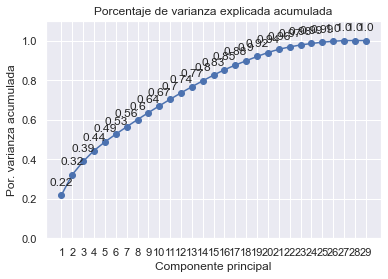

In [23]:
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data[quant].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data[quant].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

Para mantener el mayor porcentaje de la varianza posible, se tomaron 21 dimensiones. Esto permite tener hasta 95.60% de la varianza.

### Reglas de asociacion apriori

In [51]:
#sacaremos todas las variables cuantitativas a otro df 
quants = data[quant]
df = pd.DataFrame()
df = quants.copy()

#necesitamos las transacciones
transacts = []
for i in range(0, len(df)):
    transacts.append([str(df.values[i,j]) for j in range(0,len(df.columns))])

#entrenamiento del modelo
rule = apriori(transactions = transacts, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

#resultados
output = list(rule)
lhs         = [tuple(result[2][0][0])[0] for result in output]
rhs         = [tuple(result[2][0][1])[0] for result in output]
support    = [result[1] for result in output]
confidence = [result[2][0][2] for result in output]
lift       = [result[2][0][3] for result in output]
output_DataFrame = pd.DataFrame(
    list(zip(lhs, rhs, support, confidence, lift)),
    columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift']
)
output_DataFrame



,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,48.0,100.0,0.005479,0.216216,4.575010
1,10140.0,78.0,0.003425,1.000000,41.714286
2,10400.0,80.0,0.003425,1.000000,15.368421
3,10800.0,60.0,0.008219,0.857143,7.630662
4,110000.0,5.0,0.006164,0.692308,3.414761
5,128.0,60.0,0.004110,0.375000,3.338415
6,135000.0,60.0,0.004110,0.352941,3.142037
7,140.0,420.0,0.004795,0.233333,10.989247
8,4435.0,140.0,0.003425,1.000000,48.666667
9,848.0,140.0,0.004110,0.428571,20.857143


### Conclusiones

Una gran parte de los datos tienen una distribución normal, lo que permite hacer asunciones para guiar el proceso del análisis.

Los componentes principales nos dan a entender dos cosas principales

1. Las variables que representan 'lujos' suelen tener menor correlacion, pues aumentan el precio de una casa, pero no son la unica dependencia.

2. La mayor correlacion y agrupaciones se dan en las variables como: Tamaños de patio, si existe dicho patio. Tamaño de garage, si existe un garage.

3. Mayormente se denota una confianza y un lift bajos en las reglas utilizadas por el algoritmo apriori, siendo que, de 67 reglas:
    a. 47 de las reglas tienen una confianza menor al 70%
    b. 64 de las reglas tienen un lift menor a los 70 puntos